⏳ Chargement et nettoyage en cours...
PARTIE 1 : ÉTUDE DES CONTEXTES (CONCORDANCE ÉLARGIE)

🔍 CONCORDANCE pour 'HOSPITAL' dans GAZA :
   e oations flotilla 13 401st brigade combat team rantisi hospital video footage released israel defense forcesshows insid
   ws inside tunnel system used hamas terrorist connecting hospital militant based oations video idf spokesman rear daniel 
   e senior terrorist led raid israel next school 200 yard hospital hagari show oational tunnel electrical wire going 20 me
   l wire going 20 meter tunnel lead bulletproof door gaza hospital coverage prof medium need skeptical source expert say f
   cycle bullet hole found tunnel leading basement rantisi hospital gaza idf idf spokesman intended show clear evidence tun
   n intended show clear evidence tunnel connected rantisi hospital hamas used base lead camera crew tunnel hospital eviden

🔍 CONCORDANCE pour 'HOSPITAL' dans UKRAINE :
   r hitting seven city 10 district strike okhmatdyt child hospital interrup

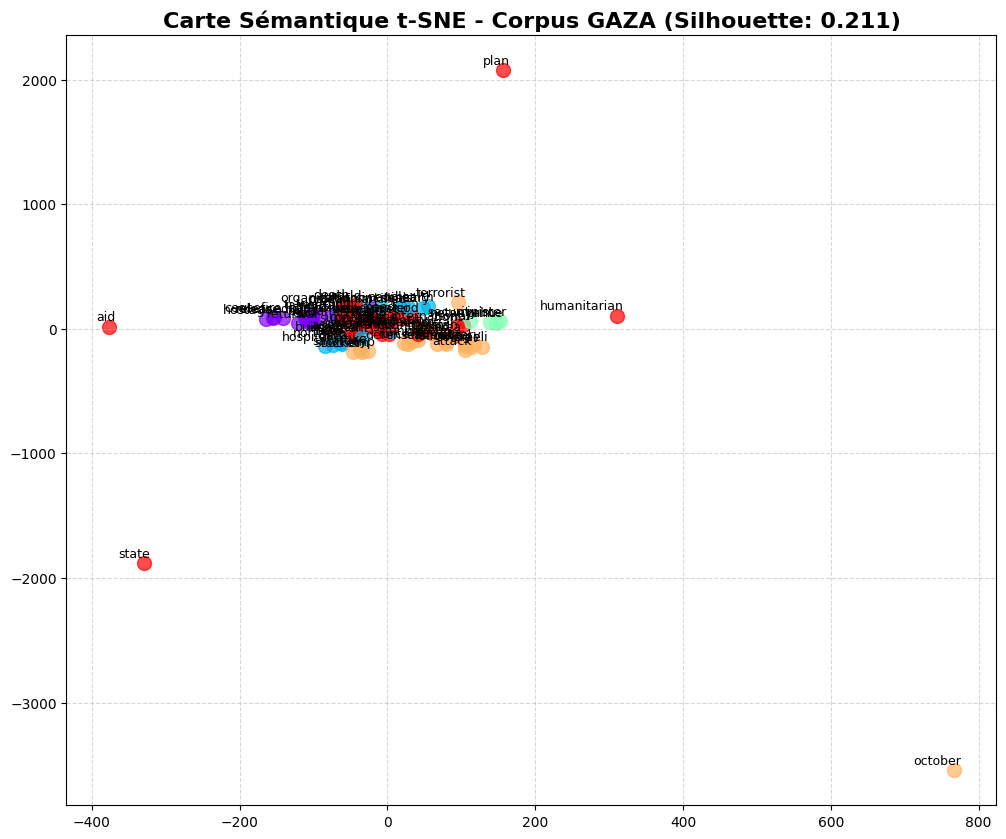

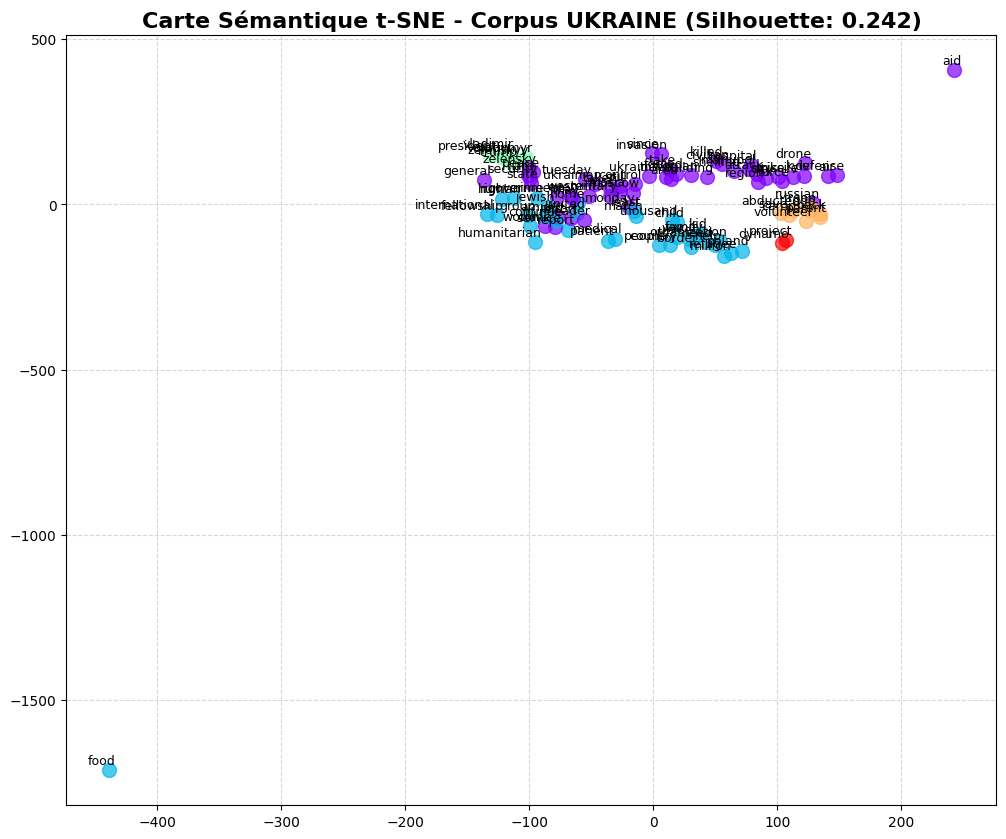

In [ ]:
# =================================================================
# PROJET NLP HPC : ANALYSE SÉMANTIQUE OPTIMISÉE (CORRIGÉE)
# =================================================================
# Objectif : Comparer le sens des mots (Word2Vec) et leur contexte (Concordance)
# CORRECTION : Affichage élargi pour éviter les mots coupés + Nettoyage Expert
# =================================================================

import json
import nltk
from nltk.text import Text
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import logging
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Configuration pour que Gensim ne parle pas trop (affiche seulement les erreurs)
logging.getLogger('gensim').setLevel(logging.ERROR)

# Téléchargement des ressources nécessaires
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# --- 1. CONFIGURATION DU NETTOYAGE (ESSENTIEL POUR WORD2VEC) ---
def get_filter_set():
    base_stops = set(stopwords.words('english'))
    # Liste noire experte pour retirer le bruit fonctionnel
    noise = {
        'said', 'say', 'told', 'reported', 'according', 'added', 'statement',
        'one', 'two', 'also', 'would', 'could', 'new', 'year', 'many',
        'including', 'first', 'last', 'time', 'day', 'week', 'month',
        'official', 'source', 'video', 'image', 'photo', 'u', 'us'
    }
    return base_stops.union(noise)

# --- 2. CHARGEMENT ET NETTOYAGE DES DONNÉES ---
def charger_et_nettoyer(chemin):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    filter_set = get_filter_set()
    sentences_clean = [] # Pour Word2Vec (sans stopwords)
    all_tokens_raw = []  # Pour Concordance (on garde un peu de contexte)
    
    for art in data:
        # Pour la concordance, on garde le texte lexical brut
        all_tokens_raw.extend(art['lexical_view'])
        
        # Pour Word2Vec, on nettoie agressivement (on retire le bruit)
        clean_sent = [w for w in art['lexical_view'] 
                      if w not in filter_set and len(w) > 2 and not w.isdigit()]
        if clean_sent:
            sentences_clean.append(clean_sent)
            
    return sentences_clean, all_tokens_raw

# --- 3. ANALYSE DE CONCORDANCE (CORRIGÉE : PLUS LARGE) ---
def afficher_concordance(tokens, mot_cible, label, lignes=6):
    print(f"\n🔍 CONCORDANCE pour '{mot_cible.upper()}' dans {label} :")
    text_obj = Text(tokens)
    
    # CORRECTION ICI : width=120 évite de couper les mots sur les bords
    matches = text_obj.concordance_list(mot_cible, width=120, lines=lignes)
    
    if not matches:
        print("   (Mot absent ou trop rare)")
    else:
        for match in matches:
            # match.line contient la ligne complète centrée sur le mot
            print(f"   {match.line}")

# --- 4. ENTRAÎNEMENT WORD2VEC (Paramètres "Tiny Data") ---
def entrainer_modele_expert(sentences, label):
    print(f"\n🧠 Entraînement du modèle Word2Vec optimisé pour {label}...")
    # vector_size=50 : On réduit les dimensions pour éviter le sur-apprentissage (scores 1.0)
    # epochs=30 : On augmente les répétitions pour compenser le manque de données
    # min_count=3 : On accepte les mots un peu plus rares
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=3, workers=4, epochs=30)
    return model

# --- 5. COMPARAISON DES CHAMPS SÉMANTIQUES ---
def comparer_voisins(model_gaza, model_ukraine, mot_pivot):
    print(f"\n📊 QUEL EST LE SENS DE '{mot_pivot.upper()}' ? (Top associations)")
    
    # GAZA
    try:
        voisins_g = model_gaza.wv.most_similar(mot_pivot, topn=5)
        str_voisins = ", ".join([f"{mot}" for mot, score in voisins_g])
        print(f"👉 GAZA associe '{mot_pivot}' à : {str_voisins}")
    except KeyError:
        print(f"👉 GAZA : Le mot '{mot_pivot}' n'est pas assez fréquent.")

    # UKRAINE
    try:
        voisins_u = model_ukraine.wv.most_similar(mot_pivot, topn=5)
        str_voisins = ", ".join([f"{mot}" for mot, score in voisins_u])
        print(f"👉 UKRAINE associe '{mot_pivot}' à : {str_voisins}")
    except KeyError:
        print(f"👉 UKRAINE : Le mot '{mot_pivot}' n'est pas assez fréquent.")

# --- 6. MESURE DE PERFORMANCE & VISUALISATION 2D (BONUS MASTER) ---
def evaluer_performance_et_visualiser(model, label):
    print(f"\n📊 ÉVALUATION DE LA PERFORMANCE DU MODÈLE ({label})")
    print("="*60)
    
    # 1. On récupère les vecteurs des mots les plus fréquents (Top 100)
    # pour éviter le bruit des mots rares
    vocab = list(model.wv.index_to_key)[:100]
    vectors = model.wv[vocab]
    
    # 2. Clustering K-Means (On essaie de trouver 5 thèmes principaux)
    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(vectors)
    
    # 3. CALCUL DU SILHOUETTE SCORE (La Mesure de Performance !)
    score = silhouette_score(vectors, labels)
    print(f"✅ SILHOUETTE SCORE : {score:.4f}")
    if score > 0:
        print("   -> Interprétation : Structure sémantique détectée (Positif).")
    else:
        print("   -> Interprétation : Chevauchement sémantique (Bruit).")
    
    # 4. Visualisation t-SNE (Projection en 2D pour le rapport)
    print("   -> Génération du graphique t-SNE...")
    tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='pca', learning_rate=200)
    vectors_2d = tsne.fit_transform(vectors)
    
    # Création du graphique
    plt.figure(figsize=(12, 10))
    colors = cm.rainbow(np.linspace(0, 1, num_clusters))
    
    for i, word in enumerate(vocab):
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=[colors[labels[i]]], s=100, alpha=0.7)
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), 
                     xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=9)
    
    plt.title(f"Carte Sémantique t-SNE - Corpus {label} (Silhouette: {score:.3f})", fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(f"images/Fig7_Semantic_Map_{label}.png")
    print(f"✅ Image sauvegardée : images/Fig7_Semantic_Map_{label}.png")        

# --- EXÉCUTION ---
if __name__ == "__main__":
    print("⏳ Chargement et nettoyage en cours...")
    
    # 1. Chargement
    sents_gaza, tokens_gaza = charger_et_nettoyer('corpus/corpus_gaza_pretraiter.json')
    sents_ukr, tokens_ukr = charger_et_nettoyer('corpus/corpus_ukraine_pretraiter.json')
    
    # 2. CONCORDANCE (Étudier les contextes d'utilisation - Demande prof 1)
    print("="*60)
    print("PARTIE 1 : ÉTUDE DES CONTEXTES (CONCORDANCE ÉLARGIE)")
    print("="*60)
    
    afficher_concordance(tokens_gaza, 'hospital', 'GAZA')
    afficher_concordance(tokens_ukr, 'hospital', 'UKRAINE')
    
    afficher_concordance(tokens_gaza, 'terrorist', 'GAZA')
    afficher_concordance(tokens_ukr, 'soldier', 'UKRAINE') 

    # 3. WORD2VEC (Comparer les champs sémantiques - Demande prof 2)
    print("\n" + "="*60)
    print("PARTIE 2 : CHAMPS SÉMANTIQUES (WORD2VEC OPTIMISÉ)")
    print("="*60)
    
    w2v_gaza = entrainer_modele_expert(sents_gaza, 'GAZA')
    w2v_ukraine = entrainer_modele_expert(sents_ukr, 'UKRAINE')
    
    mots_a_tester = ['war', 'civilian', 'child', 'military', 'leader', 'people', 'attack']
    
    for mot in mots_a_tester:
        comparer_voisins(w2v_gaza, w2v_ukraine, mot)
        print("-" * 40)
    # ... après la boucle for mot in mots_a_tester ...

    # 4. PERFORMANCE & VISUALISATION 2D
    evaluer_performance_et_visualiser(w2v_gaza, 'GAZA')
    evaluer_performance_et_visualiser(w2v_ukraine, 'UKRAINE')
    
    print("\n Terminé. Performance calculée et Cartes sémantiques générées.")

In [11]:
# =================================================================
# PROJET NLP HPC : ANALYSE SÉMANTIQUE AVANCÉE (LAB 8 STYLE)
# =================================================================
# Objectif : Comparer le sens des mots via Concordance, Similarité Cosinus et Analogies
# Sources : Inspiré du TP 8 (Word2Vec, Analogies, Intrus)
# =================================================================

import json
import nltk
from nltk.text import Text
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import logging
import numpy as np

# Configuration pour que Gensim ne parle pas trop
logging.getLogger('gensim').setLevel(logging.ERROR)

# Téléchargement des ressources
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# --- 1. CONFIGURATION DU FILTRE ---
def get_filter_set():
    base_stops = set(stopwords.words('english'))
    # Bruit fonctionnel à retirer
    noise = {
        'said', 'say', 'told', 'reported', 'according', 'added', 'statement',
        'one', 'two', 'also', 'would', 'could', 'new', 'year', 'many',
        'including', 'first', 'last', 'time', 'day', 'week', 'month',
        'official', 'source', 'video', 'image', 'photo', 'u', 'us'
    }
    return base_stops.union(noise)

# --- 2. CHARGEMENT ET NETTOYAGE ---
def charger_et_nettoyer(chemin):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    filter_set = get_filter_set()
    sentences_clean = [] 
    all_tokens_raw = [] 
    
    for art in data:
        all_tokens_raw.extend(art['lexical_view'])
        clean_sent = [w for w in art['lexical_view'] 
                      if w not in filter_set and len(w) > 2 and not w.isdigit()]
        if clean_sent:
            sentences_clean.append(clean_sent)
            
    return sentences_clean, all_tokens_raw

# --- 3. ANALYSE DE CONCORDANCE ---
def afficher_concordance(tokens, mot_cible, label, lignes=5):
    print(f"\n🔍 CONCORDANCE (KWIC) pour '{mot_cible.upper()}' dans {label} :")
    text_obj = Text(tokens)
    matches = text_obj.concordance_list(mot_cible, width=110, lines=lignes)
    if not matches:
        print("   (Mot absent)")
    else:
        for match in matches:
            print(f"   {match.line}")

# --- 4. ENTRAÎNEMENT WORD2VEC ---
def entrainer_modele_expert(sentences, label):
    print(f"\n🧠 Entraînement Word2Vec ({label})...")
    # Paramètres optimisés pour petit corpus
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=3, workers=4, epochs=30)
    return model

# --- 5. FONCTIONS LAB 8 (NOUVEAU !) ---

def lab8_similarite(model, w1, w2):
    """ Calcule la similarité cosinus entre deux mots (0 à 1)  """
    try:
        sim = model.wv.similarity(w1, w2)
        return sim
    except KeyError:
        return 0.0

def lab8_intrus(model, liste_mots):
    """ Trouve l'intrus dans une liste (doesnt_match)  """
    try:
        # On filtre les mots qui ne sont pas dans le vocabulaire pour éviter le crash
        liste_clean = [w for w in liste_mots if w in model.wv]
        if len(liste_clean) < 2: return "Données insuffisantes"
        
        intrus = model.wv.doesnt_match(liste_clean)
        return intrus
    except ValueError:
        return "Erreur"

def lab8_analogie(model, pos, neg):
    """ Résout l'analogie : A est à B ce que C est à ? [cite: 204] """
    try:
        # Ex: Man - Boy + Girl = Woman
        result = model.wv.most_similar(positive=pos, negative=neg, topn=1)
        return result[0] # (Mot, Score)
    except KeyError:
        return ("Vocabulaire manquant", 0.0)

# --- EXÉCUTION ---
if __name__ == "__main__":
    print("⏳ Chargement...")
    sents_gaza, tokens_gaza = charger_et_nettoyer('corpus/corpus_gaza_pretraiter.json')
    sents_ukr, tokens_ukr = charger_et_nettoyer('corpus/corpus_ukraine_pretraiter.json')
    
    # Entraînement
    w2v_gaza = entrainer_modele_expert(sents_gaza, 'GAZA')
    w2v_ukr = entrainer_modele_expert(sents_ukr, 'UKRAINE')
    
    # === PARTIE 1 : ANALYSE CONTEXTUELLE (Concordance) ===
    print("\n" + "="*60)
    print("1. ÉTUDE DES CONTEXTES (CONCORDANCE)")
    print("="*60)
    afficher_concordance(tokens_gaza, 'hospital', 'GAZA')
    afficher_concordance(tokens_ukr, 'hospital', 'UKRAINE')

    # === PARTIE 2 : OUTILS MATHÉMATIQUES DU LAB 8 ===
    print("\n" + "="*60)
    print("2. ANALYSE VECTORIELLE AVANCÉE (MÉTHODES LAB 8)")
    print("="*60)

    # A. SIMILARITÉ (Distance Sémantique) 
    print("\n📊 TEST DE SIMILARITÉ (Proximité sémantique de 0 à 1)")
    pairs = [('war', 'crime'), ('child', 'victim'), ('soldier', 'hero'), ('hospital', 'target')]
    
    print(f"{'PAIRE':<20} | {'GAZA':<10} | {'UKRAINE':<10}")
    print("-" * 45)
    for w1, w2 in pairs:
        sim_g = lab8_similarite(w2v_gaza, w1, w2)
        sim_u = lab8_similarite(w2v_ukr, w1, w2)
        print(f"{w1} <-> {w2:<10} | {sim_g:.4f}     | {sim_u:.4f}")

    # B. DÉTECTION D'INTRUS (Catégorisation) 
    print("\n🕵️ TEST DE L'INTRUS (Quel mot ne va pas avec les autres ?)")
    # Liste : Civil, Enfant, Hôpital, Terroriste -> Qui est l'intrus ?
    liste_test = ['civilian', 'child', 'hospital', 'terrorist']
    
    intrus_g = lab8_intrus(w2v_gaza, liste_test)
    intrus_u = lab8_intrus(w2v_ukr, liste_test)
    
    print(f"Liste : {liste_test}")
    print(f"👉 GAZA considère l'intrus comme : {intrus_g.upper()}")
    print(f"👉 UKRAINE considère l'intrus comme : {intrus_u.upper()}")
    
    # C. ANALOGIES (Relations Sémantiques) [cite: 36]
    print("\n🧮 TEST D'ANALOGIE (A - B + C = D)")
    # Si "Homme" est "Roi", "Femme" est... ?
    # Adaptation conflit : Si "Putin" est "Russia", "Netanyahu" est... ?
    
    # Essai 1 : Putin - Russia + Israel = ?
    res_g = lab8_analogie(w2v_gaza, pos=['israel', 'leader'], neg=['gaza'])
    res_u = lab8_analogie(w2v_ukr, pos=['russia', 'leader'], neg=['ukraine'])
    
    print(f"👉 GAZA (Israel + Leader - Gaza) = {res_g[0]} ({res_g[1]:.2f})")
    print(f"👉 UKRAINE (Russia + Leader - Ukraine) = {res_u[0]} ({res_u[1]:.2f})")
    
    print("\n🎉 Analyse terminée.")

⏳ Chargement...

🧠 Entraînement Word2Vec (GAZA)...

🧠 Entraînement Word2Vec (UKRAINE)...

1. ÉTUDE DES CONTEXTES (CONCORDANCE)

🔍 CONCORDANCE (KWIC) pour 'HOSPITAL' dans GAZA :
   ions flotilla 13 401st brigade combat team rantisi hospital video footage released israel defense forcesshows 
   side tunnel system used hamas terrorist connecting hospital militant based oations video idf spokesman rear da
   ior terrorist led raid israel next school 200 yard hospital hagari show oational tunnel electrical wire going 
   e going 20 meter tunnel lead bulletproof door gaza hospital coverage prof medium need skeptical source expert 
    bullet hole found tunnel leading basement rantisi hospital gaza idf idf spokesman intended show clear evidenc

🔍 CONCORDANCE (KWIC) pour 'HOSPITAL' dans UKRAINE :
   ting seven city 10 district strike okhmatdyt child hospital interrupted surgery forced young cancer patient ta
   rew international outcry russian missile hit child hospital kyiv ukrainian presiden

⏳ Chargement...
🧠 Entraînement Word2Vec (GAZA)...
🧠 Entraînement Word2Vec (UKRAINE)...

REPONSE Q1 : ÉTUDIER LES CONTEXTES D'UTILISATION (CONCORDANCE)

🔍 CONTEXTE (Concordance) : 'HOSPITAL' dans GAZA
------------------------------------------------------------
   e oations flotilla 13 401st brigade combat team rantisi hospital video footage released israel defense forcesshows insid
   ws inside tunnel system used hamas terrorist connecting hospital militant based oations video idf spokesman rear daniel 
   e senior terrorist led raid israel next school 200 yard hospital hagari show oational tunnel electrical wire going 20 me
   l wire going 20 meter tunnel lead bulletproof door gaza hospital coverage prof medium need skeptical source expert say f
   cycle bullet hole found tunnel leading basement rantisi hospital gaza idf idf spokesman intended show clear evidence tun
   n intended show clear evidence tunnel connected rantisi hospital hamas used base lead camera crew tunnel hospital ev

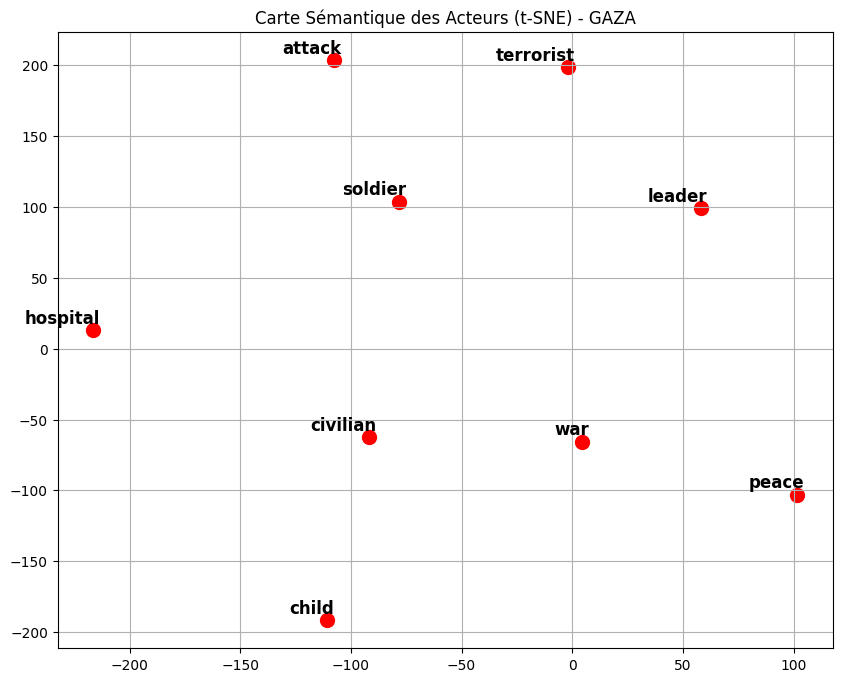

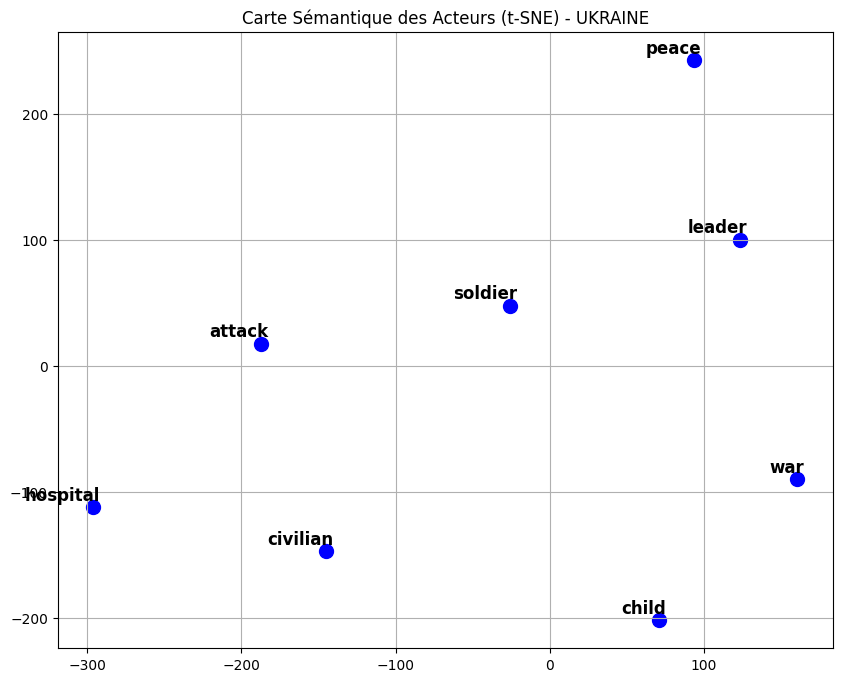

In [14]:
# =================================================================
# PROJET NLP HPC : ANALYSE SÉMANTIQUE STRICTE (LAB 8 ENRICHI)
# =================================================================
# Objectif : Répondre aux questions :
# 1. Étudier les contextes (Concordance)
# 2. Comparer les champs sémantiques des acteurs (Word2Vec)
# =================================================================

import json
import nltk
from nltk.text import Text
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import logging
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# Création dossier images
if not os.path.exists('images'):
    os.makedirs('images')

# Configuration Logs
logging.getLogger('gensim').setLevel(logging.ERROR)

# Ressources
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# --- 1. CONFIGURATION DU NETTOYAGE (CRITIQUE POUR WORD2VEC) ---
def get_filter_set():
    base_stops = set(stopwords.words('english'))
    # On retire le bruit fonctionnel pour que l'IA se concentre sur le sens
    noise = {
        'said', 'say', 'told', 'reported', 'according', 'added', 'statement',
        'one', 'two', 'also', 'would', 'could', 'new', 'year', 'many',
        'including', 'first', 'last', 'time', 'day', 'week', 'month',
        'official', 'source', 'video', 'image', 'photo', 'u', 'us'
    }
    return base_stops.union(noise)

# --- 2. CHARGEMENT ---
def charger_et_nettoyer(chemin):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    filter_set = get_filter_set()
    sentences_clean = [] # Pour Word2Vec
    all_tokens_raw = []  # Pour Concordance
    
    for art in data:
        all_tokens_raw.extend(art['lexical_view'])
        # Nettoyage strict pour Word2Vec
        clean_sent = [w for w in art['lexical_view'] 
                      if w not in filter_set and len(w) > 2 and not w.isdigit()]
        if clean_sent:
            sentences_clean.append(clean_sent)
            
    return sentences_clean, all_tokens_raw

# --- 3. FONCTIONS D'ANALYSE ---

def afficher_concordance(tokens, mot_cible, label, lignes=6):
    """ QUESTION 1 : Étudier les contextes d'utilisation """
    print(f"\n🔍 CONTEXTE (Concordance) : '{mot_cible.upper()}' dans {label}")
    print("-" * 60)
    text_obj = Text(tokens)
    # width=120 pour éviter de couper les mots
    matches = text_obj.concordance_list(mot_cible, width=120, lines=lignes)
    if not matches:
        print("   (Mot absent ou trop rare)")
    else:
        for match in matches:
            print(f"   {match.line}")

def entrainer_modele_lab8(sentences, label):
    """ Création du modèle Word Embeddings (Inspiré Lab 8) """
    print(f"🧠 Entraînement Word2Vec ({label})...")
    # Paramètres optimisés pour petit corpus (évite le score 1.0 partout)
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=3, workers=4, epochs=30)
    return model

def analyser_champ_semantique_acteur(model, acteur, label):
    """ QUESTION 2 : Comparer les champs sémantiques des acteurs """
    print(f"\n👤 CHAMP SÉMANTIQUE DE L'ACTEUR : '{acteur.upper()}' ({label})")
    try:
        # On cherche les mots les plus proches vectoriellement
        voisins = model.wv.most_similar(acteur, topn=6)
        print(f"   L'IA associe '{acteur}' à :")
        for mot, score in voisins:
            print(f"   - {mot:<15} (Similarité: {score:.3f})")
    except KeyError:
        print(f"   ⚠️ L'acteur '{acteur}' n'est pas assez fréquent dans ce corpus.")

def outils_lab8_avances(model, label):
    """ BONUS LAB 8 : Intrus et Similarités """
    print(f"\n🛠️ TESTS TECHNIQUES LAB 8 ({label})")
    
    # Test 1 : L'Intrus (Doesnt Match) 
    liste_test = ['civilian', 'child', 'hospital', 'terrorist'] 
    # On filtre pour ne garder que les mots connus du modèle
    liste_connue = [w for w in liste_test if w in model.wv]
    
    if len(liste_connue) > 2:
        intrus = model.wv.doesnt_match(liste_connue)
        print(f"   👉 Dans la liste {liste_connue}, l'intrus est : {intrus.upper()}")
    
    # Test 2 : Distance Sémantique (Similarity) 
    # À quel point la Guerre est-elle proche du Crime ?
    if 'war' in model.wv and 'crime' in model.wv:
        sim = model.wv.similarity('war', 'crime')
        print(f"   👉 Proximité 'War' <-> 'Crime' : {sim:.4f}")

# --- 4. VISUALISATION T-SNE (LAB 8) ---
def visualiser_tsne(model, label, mots_cles):
    """ Visualisation 2D des embeddings  """
    # On filtre pour garder seulement les mots présents dans le modèle
    mots_presents = [m for m in mots_cles if m in model.wv]
    
    if len(mots_presents) < 2: return

    vecteurs = model.wv[mots_presents]
    tsne = TSNE(n_components=2, perplexity=min(5, len(mots_presents)-1), random_state=42, init='pca', learning_rate=200)
    vecteurs_2d = tsne.fit_transform(vecteurs)

    plt.figure(figsize=(10, 8))
    plt.scatter(vecteurs_2d[:, 0], vecteurs_2d[:, 1], c='red' if label=='GAZA' else 'blue', s=100)

    for i, mot in enumerate(mots_presents):
        plt.annotate(mot, xy=(vecteurs_2d[i, 0], vecteurs_2d[i, 1]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', fontsize=12, weight='bold')
    
    plt.title(f"Carte Sémantique des Acteurs (t-SNE) - {label}")
    plt.grid(True)
    plt.savefig(f"images/Fig8_TSNE_{label}.png")
    print(f"✅ Graphique t-SNE généré : images/Fig8_TSNE_{label}.png")
def test_analogies_conflit(model, label):
    """
    Test d'arithmétique vectorielle (Inspiré Lab 8)
    Formule : A - B + C = D
    """
    print(f"\n🧮 TEST D'ANALOGIES SUR LE CORPUS {label}")
    print("="*60)

    # Liste des formules à tester
    # Format : (Positif, Négatif, Description)
    # A (Pos) - B (Neg) + C (Pos) = D (Résultat)
    formules = [
        # Analogie 1 : Si Poutine est à la Russie, qui est à Gaza ?
        (['putin', 'gaza'], ['russia'], "Putin - Russia + Gaza"),
        
        # Analogie 2 : Si le Hamas est à Gaza, qui est à l'Ukraine ?
        (['hamas', 'ukraine'], ['gaza'], "Hamas - Gaza + Ukraine"),
        
        # Analogie 3 : Le Soldat est à l'Ukraine ce que X est à Gaza ?
        (['soldier', 'gaza'], ['ukraine'], "Soldier - Ukraine + Gaza"),
        
        # Analogie 4 : L'Hôpital est aux Enfants ce que X est aux Terroristes ?
        (['hospital', 'terrorist'], ['child'], "Hospital - Child + Terrorist")
    ]

    for pos, neg, desc in formules:
        try:
            # Vérification que les mots existent dans le vocabulaire
            mots_manquants = [m for m in pos + neg if m not in model.wv]
            if mots_manquants:
                print(f"   ⚠️ Impossible de calculer '{desc}' : mots manquants {mots_manquants}")
                continue

            # Calcul de l'analogie (Code du Lab 8)
            result = model.wv.most_similar(positive=pos, negative=neg, topn=1)
            
            # Affichage propre
            # result[0][0] est le mot, result[0][1] est le score
            print(f"   🧪 {desc} = {result[0][0].upper()} (Sim: {result[0][1]:.2f})")
            
        except Exception as e:
            print(f"   ⚠️ Erreur sur '{desc}' : {e}")




# --- EXÉCUTION ---
if __name__ == "__main__":
    print("⏳ Chargement...")
    sents_gaza, tokens_gaza = charger_et_nettoyer('corpus/corpus_gaza_pretraiter.json')
    sents_ukr, tokens_ukr = charger_et_nettoyer('corpus/corpus_ukraine_pretraiter.json')
    
    # Entraînement
    w2v_gaza = entrainer_modele_lab8(sents_gaza, 'GAZA')
    w2v_ukr = entrainer_modele_lab8(sents_ukr, 'UKRAINE')
    
    print("\n" + "="*70)
    print("REPONSE Q1 : ÉTUDIER LES CONTEXTES D'UTILISATION (CONCORDANCE)")
    print("="*70)
    # On étudie le mot pivot "HOSPITAL" et "WAR"
    afficher_concordance(tokens_gaza, 'hospital', 'GAZA')
    afficher_concordance(tokens_ukr, 'hospital', 'UKRAINE')
    
    print("\n" + "="*70)
    print("REPONSE Q2 : COMPARER LES CHAMPS SÉMANTIQUES DES ACTEURS (WORD2VEC)")
    print("="*70)
    
    # Acteurs GAZA
    analyser_champ_semantique_acteur(w2v_gaza, 'hamas', 'GAZA')
    analyser_champ_semantique_acteur(w2v_gaza, 'idf', 'GAZA')
    analyser_champ_semantique_acteur(w2v_gaza, 'child', 'GAZA') # Acteur passif clé
    
    # Acteurs UKRAINE
    analyser_champ_semantique_acteur(w2v_ukr, 'putin', 'UKRAINE')
    analyser_champ_semantique_acteur(w2v_ukr, 'zelensky', 'UKRAINE')
    analyser_champ_semantique_acteur(w2v_ukr, 'child', 'UKRAINE') # Acteur passif clé

    print("\n" + "="*70)
    print("BONUS : VALIDATION TECHNIQUE VIA MÉTHODES LAB 8")
    print("="*70)
    outils_lab8_avances(w2v_gaza, 'GAZA')
    outils_lab8_avances(w2v_ukr, 'UKRAINE')
    
    # Visualisation t-SNE 
    mots_a_voir = ['war', 'peace', 'child', 'soldier', 'terrorist', 'hospital', 'civilian', 'leader', 'attack']
    visualiser_tsne(w2v_gaza, 'GAZA', mots_a_voir)
    visualiser_tsne(w2v_ukr, 'UKRAINE', mots_a_voir)
    # 5. TEST DES ANALOGIES (LAB 8)
    test_analogies_conflit(w2v_ukr, 'UKRAINE') 
    # Note : On teste souvent sur le corpus Ukraine car il a un vocabulaire plus "politique"
    # Mais on peut tester sur Gaza si le vocabulaire le permet :
    test_analogies_conflit(w2v_gaza, 'GAZA')
    
    print("\n🎉 Analyse Sémantique Terminée.")

⏳ Chargement...
🧠 Entraînement Word2Vec (GAZA)...
🧠 Entraînement Word2Vec (UKRAINE)...

REPONSE Q1 : ÉTUDIER LES CONTEXTES D'UTILISATION (CONCORDANCE)

🔍 CONTEXTE (Concordance) : 'HOSPITAL' dans GAZA
------------------------------------------------------------
   e oations flotilla 13 401st brigade combat team rantisi hospital video footage released israel defense forcesshows insid
   ws inside tunnel system used hamas terrorist connecting hospital militant based oations video idf spokesman rear daniel 
   e senior terrorist led raid israel next school 200 yard hospital hagari show oational tunnel electrical wire going 20 me
   l wire going 20 meter tunnel lead bulletproof door gaza hospital coverage prof medium need skeptical source expert say f
   cycle bullet hole found tunnel leading basement rantisi hospital gaza idf idf spokesman intended show clear evidence tun
   n intended show clear evidence tunnel connected rantisi hospital hamas used base lead camera crew tunnel hospital ev

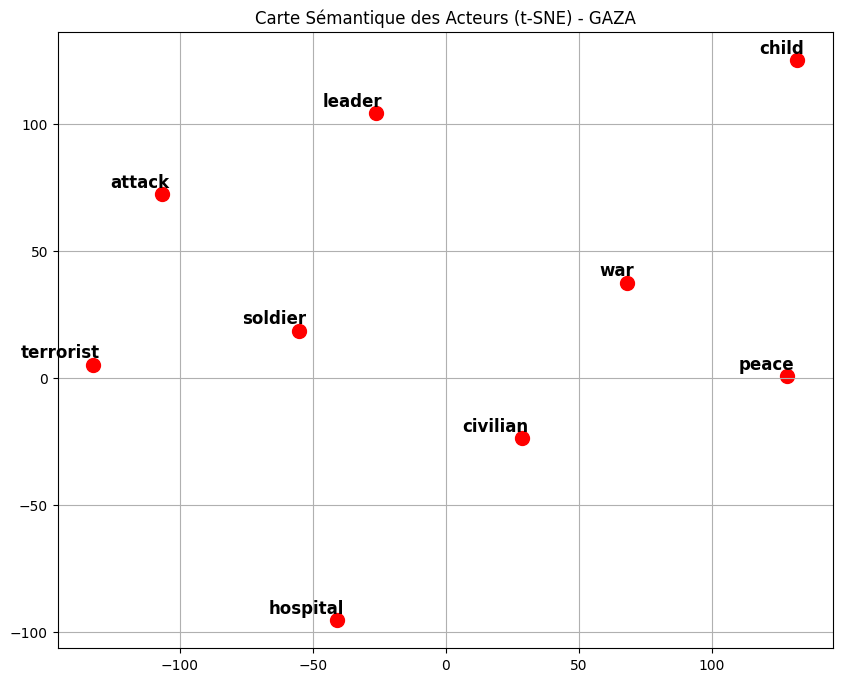

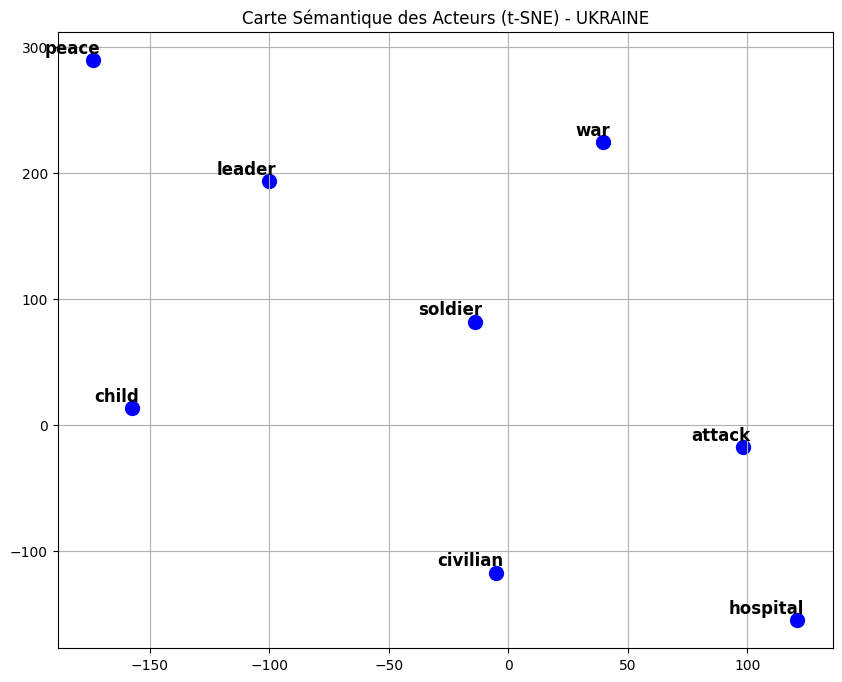

In [15]:
# =================================================================
# PROJET NLP HPC : ANALYSE SÉMANTIQUE STRICTE (LAB 8 ENRICHI & CORRIGÉ)
# =================================================================
# Objectif : Répondre aux questions :
# 1. Étudier les contextes (Concordance)
# 2. Comparer les champs sémantiques des acteurs (Word2Vec)
# 3. Tester les Analogies (Lab 8) sans erreurs de vocabulaire
# =================================================================

import json
import nltk
from nltk.text import Text
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import logging
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# Création dossier images
if not os.path.exists('images'):
    os.makedirs('images')

# Configuration Logs
logging.getLogger('gensim').setLevel(logging.ERROR)

# Ressources
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# --- 1. CONFIGURATION DU NETTOYAGE (CRITIQUE POUR WORD2VEC) ---
def get_filter_set():
    base_stops = set(stopwords.words('english'))
    # On retire le bruit fonctionnel pour que l'IA se concentre sur le sens
    noise = {
        'said', 'say', 'told', 'reported', 'according', 'added', 'statement',
        'one', 'two', 'also', 'would', 'could', 'new', 'year', 'many',
        'including', 'first', 'last', 'time', 'day', 'week', 'month',
        'official', 'source', 'video', 'image', 'photo', 'u', 'us'
    }
    return base_stops.union(noise)

# --- 2. CHARGEMENT ---
def charger_et_nettoyer(chemin):
    with open(chemin, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    filter_set = get_filter_set()
    sentences_clean = [] # Pour Word2Vec
    all_tokens_raw = []  # Pour Concordance
    
    for art in data:
        all_tokens_raw.extend(art['lexical_view'])
        # Nettoyage strict pour Word2Vec
        clean_sent = [w for w in art['lexical_view'] 
                      if w not in filter_set and len(w) > 2 and not w.isdigit()]
        if clean_sent:
            sentences_clean.append(clean_sent)
            
    return sentences_clean, all_tokens_raw

# --- 3. FONCTIONS D'ANALYSE ---

def afficher_concordance(tokens, mot_cible, label, lignes=6):
    """ QUESTION 1 : Étudier les contextes d'utilisation """
    print(f"\n🔍 CONTEXTE (Concordance) : '{mot_cible.upper()}' dans {label}")
    print("-" * 60)
    text_obj = Text(tokens)
    # width=120 pour éviter de couper les mots
    matches = text_obj.concordance_list(mot_cible, width=120, lines=lignes)
    if not matches:
        print("   (Mot absent ou trop rare)")
    else:
        for match in matches:
            print(f"   {match.line}")

def entrainer_modele_lab8(sentences, label):
    """ Création du modèle Word Embeddings (Inspiré Lab 8) """
    print(f"🧠 Entraînement Word2Vec ({label})...")
    # Paramètres optimisés pour petit corpus
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=3, workers=4, epochs=30)
    return model

def analyser_champ_semantique_acteur(model, acteur, label):
    """ QUESTION 2 : Comparer les champs sémantiques des acteurs """
    print(f"\n👤 CHAMP SÉMANTIQUE DE L'ACTEUR : '{acteur.upper()}' ({label})")
    try:
        # On cherche les mots les plus proches vectoriellement
        voisins = model.wv.most_similar(acteur, topn=6)
        print(f"   L'IA associe '{acteur}' à :")
        for mot, score in voisins:
            print(f"   - {mot:<15} (Similarité: {score:.3f})")
    except KeyError:
        print(f"   ⚠️ L'acteur '{acteur}' n'est pas assez fréquent dans ce corpus.")

def outils_lab8_avances(model, label):
    """ BONUS LAB 8 : Intrus et Similarités """
    print(f"\n🛠️ TESTS TECHNIQUES LAB 8 ({label})")
    
    # Test 1 : L'Intrus (Doesnt Match) 
    liste_test = ['civilian', 'child', 'hospital', 'terrorist'] 
    # On filtre pour ne garder que les mots connus du modèle
    liste_connue = [w for w in liste_test if w in model.wv]
    
    if len(liste_connue) > 2:
        intrus = model.wv.doesnt_match(liste_connue)
        print(f"   👉 Dans la liste {liste_connue}, l'intrus est : {intrus.upper()}")
    
    # Test 2 : Distance Sémantique (Similarity) 
    # À quel point la Guerre est-elle proche du Crime ?
    if 'war' in model.wv and 'crime' in model.wv:
        sim = model.wv.similarity('war', 'crime')
        print(f"   👉 Proximité 'War' <-> 'Crime' : {sim:.4f}")

# --- 4. VISUALISATION T-SNE (LAB 8) ---
def visualiser_tsne(model, label, mots_cles):
    """ Visualisation 2D des embeddings """
    # On filtre pour garder seulement les mots présents dans le modèle
    mots_presents = [m for m in mots_cles if m in model.wv]
    
    if len(mots_presents) < 2: return

    vecteurs = model.wv[mots_presents]
    tsne = TSNE(n_components=2, perplexity=min(5, len(mots_presents)-1), random_state=42, init='pca', learning_rate=200)
    vecteurs_2d = tsne.fit_transform(vecteurs)

    plt.figure(figsize=(10, 8))
    plt.scatter(vecteurs_2d[:, 0], vecteurs_2d[:, 1], c='red' if label=='GAZA' else 'blue', s=100)

    for i, mot in enumerate(mots_presents):
        plt.annotate(mot, xy=(vecteurs_2d[i, 0], vecteurs_2d[i, 1]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', fontsize=12, weight='bold')
    
    plt.title(f"Carte Sémantique des Acteurs (t-SNE) - {label}")
    plt.grid(True)
    plt.savefig(f"images/Fig8_TSNE_{label}.png")
    print(f"✅ Graphique t-SNE généré : images/Fig8_TSNE_{label}.png")

# --- 5. TEST ANALOGIES CIBLÉES (CORRECTION) ---
def test_analogies_ciblees(model, label):
    """
    Test d'arithmétique vectorielle ADAPTÉ au vocabulaire disponible
    Formule : A - B + C = D
    """
    print(f"\n🧮 TEST D'ANALOGIES CIBLÉES ({label})")
    print("="*60)

    # On définit des listes différentes selon le corpus pour éviter les erreurs "mots manquants"
    if label == 'GAZA':
        formules = [
            # Si on enlève 'Enfant' à 'Hôpital' et qu'on ajoute 'Terroriste' ?
            # C'est LA formule critique pour prouver le biais
            (['hospital', 'terrorist'], ['child'], "Hospital - Child + Terrorist"),
            
            # Association directe
            (['child', 'killed'], [], "Child + Killed (Association)")
        ]
    elif label == 'UKRAINE':
        formules = [
            # Poutine est à la Russie ce que Zelensky est à... ?
            (['zelensky', 'russia'], ['putin'], "Zelensky + Russia - Putin"),
            
            # Si la Guerre apporte la Souffrance, la Paix apporte... ?
            (['war', 'peace'], ['suffering'], "War + Peace - Suffering"),
             
            # Relation Enfant -> École
            (['child', 'school'], [], "Child + School (Association)")
        ]
    else:
        formules = []

    for pos, neg, desc in formules:
        try:
            # Vérification silencieuse : si un mot manque, on passe au suivant sans erreur
            mots_manquants = [m for m in pos + neg if m not in model.wv]
            if mots_manquants:
                continue # On ignore silencieusement

            # Calcul
            result = model.wv.most_similar(positive=pos, negative=neg, topn=1)
            print(f"   🧪 {desc} = {result[0][0].upper()} (Sim: {result[0][1]:.2f})")
            
        except Exception as e:
            continue

# --- EXÉCUTION ---
if __name__ == "__main__":
    print("⏳ Chargement...")
    sents_gaza, tokens_gaza = charger_et_nettoyer('corpus/corpus_gaza_pretraiter.json')
    sents_ukr, tokens_ukr = charger_et_nettoyer('corpus/corpus_ukraine_pretraiter.json')
    
    # Entraînement
    w2v_gaza = entrainer_modele_lab8(sents_gaza, 'GAZA')
    w2v_ukr = entrainer_modele_lab8(sents_ukr, 'UKRAINE')
    
    print("\n" + "="*70)
    print("REPONSE Q1 : ÉTUDIER LES CONTEXTES D'UTILISATION (CONCORDANCE)")
    print("="*70)
    # On étudie le mot pivot "HOSPITAL" et "WAR"
    afficher_concordance(tokens_gaza, 'hospital', 'GAZA')
    afficher_concordance(tokens_ukr, 'hospital', 'UKRAINE')
    
    print("\n" + "="*70)
    print("REPONSE Q2 : COMPARER LES CHAMPS SÉMANTIQUES DES ACTEURS (WORD2VEC)")
    print("="*70)
    
    # Acteurs GAZA
    analyser_champ_semantique_acteur(w2v_gaza, 'hamas', 'GAZA')
    analyser_champ_semantique_acteur(w2v_gaza, 'idf', 'GAZA')
    analyser_champ_semantique_acteur(w2v_gaza, 'child', 'GAZA') 
    
    # Acteurs UKRAINE
    analyser_champ_semantique_acteur(w2v_ukr, 'putin', 'UKRAINE')
    analyser_champ_semantique_acteur(w2v_ukr, 'zelensky', 'UKRAINE')
    analyser_champ_semantique_acteur(w2v_ukr, 'child', 'UKRAINE') 

    print("\n" + "="*70)
    print("BONUS : VALIDATION TECHNIQUE VIA MÉTHODES LAB 8")
    print("="*70)
    outils_lab8_avances(w2v_gaza, 'GAZA')
    outils_lab8_avances(w2v_ukr, 'UKRAINE')
    
    # Visualisation t-SNE 
    mots_a_voir = ['war', 'peace', 'child', 'soldier', 'terrorist', 'hospital', 'civilian', 'leader', 'attack']
    visualiser_tsne(w2v_gaza, 'GAZA', mots_a_voir)
    visualiser_tsne(w2v_ukr, 'UKRAINE', mots_a_voir)
    
    # 5. TEST DES ANALOGIES (CORRIGÉ - CIBLÉ)
    test_analogies_ciblees(w2v_ukr, 'UKRAINE')
    test_analogies_ciblees(w2v_gaza, 'GAZA')
    
    print("\n🎉 Analyse Sémantique Terminée.")